# Introduction

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
![]()

* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.

* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
pathmouse = os.path.join("data","mouse_drug_data.csv")
pathtrials = os.path.join("data","clinicaltrial_data.csv")

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(pathmouse)
trials_df = pd.read_csv(pathtrials)

In [5]:
#check out my mouse dataframe
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
#check out my trials dataframe
trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
mousetrials_df = pd.merge(trials_df, mouse_df, on="Mouse ID", how = "inner")
mousetrials_df = mousetrials_df.sort_values(by=["Timepoint", "Metastatic Sites"], ascending=True)
mousetrials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
groupeddrugtime = mousetrials_df.groupby(['Drug', 'Timepoint'])
avgtumormean = groupeddrugtime["Tumor Volume (mm3)"].mean()
avgtumormean

# Convert to DataFrame
average_tumor_df = pd.DataFrame({"Tumor Volume (mm3)":avgtumormean}).reset_index()
# Preview DataFrame
average_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderrtumormean = groupeddrugtime["Tumor Volume (mm3)"].sem()
stderrtumormean

# Convert to DataFrame
std_error_tumor = pd.DataFrame({"Tumor Volume (mm3)":stderrtumormean}).reset_index()

# Preview DataFrame
std_error_tumor.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
tumormeans_df = average_tumor_df.pivot('Timepoint', 'Drug','Tumor Volume (mm3)' )
# Preview that Reformatting worked
tumormeans_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


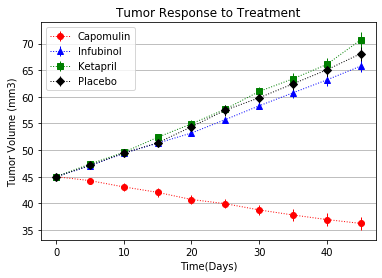

In [36]:
# Generate the Plot (with Error Bars)
t_x_axis = tumormeans_df.index.values

#gather the means and errors, per drug.  
#here is the info for Capomulin.
t_c_means = tumormeans_df["Capomulin"]
t_c_errors = std_error_tumor[std_error_tumor.Drug == 'Capomulin']['Tumor Volume (mm3)'].values

#here is the info for Infubinol.
t_i_means = tumormeans_df["Infubinol"]
t_i_errors = std_error_tumor[std_error_tumor.Drug == 'Infubinol']['Tumor Volume (mm3)'].values

#here is the info for Ketapril.
t_k_means = tumormeans_df["Ketapril"]
t_k_errors = std_error_tumor[std_error_tumor.Drug == 'Ketapril']['Tumor Volume (mm3)'].values

#here is the info for the Placebo.
t_p_means = tumormeans_df["Placebo"]
t_p_errors = std_error_tumor[std_error_tumor.Drug == 'Placebo']['Tumor Volume (mm3)'].values

#potting my data
fig, ax = plt.subplots()
ax.errorbar(t_x_axis,t_c_means, t_c_errors, fmt="o", label='Capomulin', color='red', linestyle='dotted', linewidth=1);
ax.errorbar(t_x_axis,t_i_means, t_i_errors, fmt="^", label='Infubinol', color='blue', linestyle='dotted', linewidth=1);
ax.errorbar(t_x_axis,t_k_means, t_k_errors, fmt="s", label='Ketapril', color='green', linestyle='dotted', linewidth=1);
ax.errorbar(t_x_axis,t_p_means, t_p_errors, fmt="D", label='Placebo', color='black', linestyle='dotted', linewidth=1);
ax.set(title="Tumor Response to Treatment", xlabel="Time(Days)", ylabel="Tumor Volume (mm3)");
ax.grid(axis = 'y');
ax.legend(loc='best');


# Save the Figure
fig.savefig(os.path.join("plots","01_tumorresponse.png"))

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avgmetmean = groupeddrugtime["Metastatic Sites"].mean()
avgmetmean


# Convert to DataFrame
average_met = pd.DataFrame({"Metastatic Sites":avgmetmean}).reset_index()

# Preview DataFrame
average_met.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderrmetmean = groupeddrugtime["Metastatic Sites"].sem()
stderrmetmean

# Convert to DataFrame
std_error_met = pd.DataFrame({"Metastatic Sites":stderrmetmean}).reset_index()

# Preview DataFrame
std_error_met.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames
metmeans_df = average_met.pivot('Timepoint', 'Drug','Metastatic Sites')

# Preview that Reformatting worked
metmeans_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


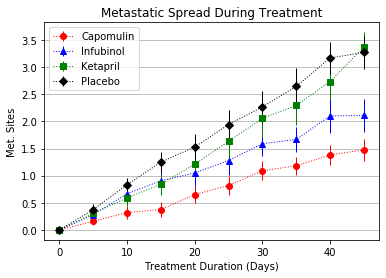

In [17]:
# Generate the Plot (with Error Bars)
m_x_axis = metmeans_df.index.values

#gather the met means and errors, per drug.  
#here is the info for Capomulin.
m_c_means = metmeans_df["Capomulin"]
m_c_errors = std_error_met[std_error_met.Drug == 'Capomulin']['Metastatic Sites'].values

#here is the info for Infubinol.
m_i_means = metmeans_df["Infubinol"]
m_i_errors = std_error_met[std_error_met.Drug == 'Infubinol']['Metastatic Sites'].values

#here is the info for Ketapril.
m_k_means = metmeans_df["Ketapril"]
m_k_errors = std_error_met[std_error_met.Drug == 'Ketapril']['Metastatic Sites'].values

#here is the info for Placebo.
m_p_means = metmeans_df["Placebo"]
m_p_errors = std_error_met[std_error_met.Drug == 'Placebo']['Metastatic Sites'].values

#plotting my data
fig2, ax2 = plt.subplots()
ax2.errorbar(m_x_axis, m_c_means, m_c_errors, fmt="o", label='Capomulin', color='red', linestyle='dotted', linewidth=1);
ax2.errorbar(m_x_axis, m_i_means, m_i_errors, fmt="^", label='Infubinol', color='blue', linestyle='dotted', linewidth=1);
ax2.errorbar(m_x_axis, m_k_means, m_k_errors, fmt="s", label='Ketapril', color='green', linestyle='dotted', linewidth=1);
ax2.errorbar(m_x_axis, m_p_means, m_p_errors, fmt="D", label='Placebo', color='black', linestyle='dotted', linewidth=1);
ax2.set(title="Metastatic Spread During Treatment", xlabel="Treatment Duration (Days)", ylabel="Met. Sites");
ax2.grid(axis = 'y');
ax2.legend(loc='best');


# Save the Figure
fig2.savefig(os.path.join("plots","02_metspread.png"))


## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount = groupeddrugtime["Metastatic Sites"].count()
mousecount

# Convert to DataFrame
mouse_count = pd.DataFrame({"Mouse Count":mousecount}).reset_index()

# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mousecount_df = mouse_count.pivot('Timepoint', 'Drug','Mouse Count')

# Preview the Data Frame
mousecount_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


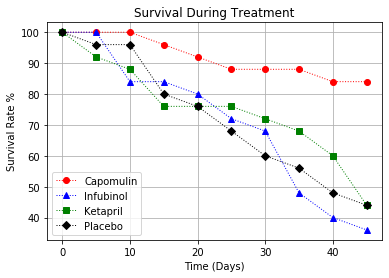

In [21]:
# Generate the Plot (Accounting for percentages)
s_x_axis = mousecount_df.index.values


#calculate the percentages, per days point, per drug

#Capomulin
s_c_perc = (mousecount_df.Capomulin.values/mousecount_df.Capomulin.values[0])*100

#Infubinol
s_i_perc = (mousecount_df.Infubinol.values/mousecount_df.Infubinol.values[0])*100

#Ketapril
s_k_perc = (mousecount_df.Ketapril.values/mousecount_df.Ketapril.values[0])*100

#Placebo
s_p_perc = (mousecount_df.Placebo.values/mousecount_df.Placebo.values[0])*100


#Plot my data 
fig3, ax3 = plt.subplots()
ax3.plot(s_x_axis, s_c_perc, marker="o", label='Capomulin', color='red', linestyle='dotted', linewidth=1);
ax3.plot(s_x_axis, s_i_perc, marker="^", label='Infubinol', color='blue', linestyle='dotted', linewidth=1);
ax3.plot(s_x_axis, s_k_perc, marker="s", label='Ketapril', color='green', linestyle='dotted', linewidth=1);
ax3.plot(s_x_axis, s_p_perc, marker="D", label='Placebo', color='black', linestyle='dotted', linewidth=1);
ax3.set(title="Survival During Treatment", xlabel="Time (Days)", ylabel="Survival Rate %");
ax3.grid();
ax3.legend(loc='best');

# Save the Figure
fig3.savefig(os.path.join("plots","03_survival.png"))


## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
change_pct = ((tumormeans_df.iloc[-1] / tumormeans_df.iloc[0])-1)*100

# Display the data to confirm
change_pct


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
#put into a dataframe
change_pct_df = pd.DataFrame({"Change":change_pct}).reset_index()
change_pct_df 

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [25]:
#select specific rows to a new DF
spec_change_pct_df = change_pct_df.iloc[[0,2,3,5], ]
spec_change_pct_df
spec_change_pct_df.set_index("Drug")

,Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


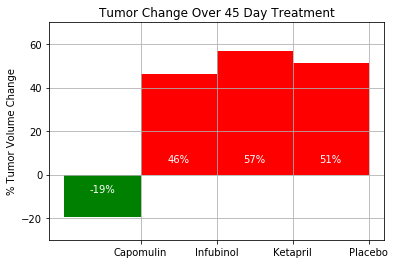

In [26]:
# Store all Relevant Percent Changes into a Tuple
select_pcts = tuple(list (spec_change_pct_df.iloc[:,1]))
select_pcts


# # Splice the data between passing and failing drugs
fig4, ax4 = plt.subplots()
num = np.arange(len(select_pcts))
width = -1
color = ["red" if i > 0 else "green" for i in select_pcts]
graph = ax4.bar(num, select_pcts, width, color=color, align ="edge");

# # Orient widths. Add labels, tick marks, etc. 
ax4.set_ylabel('% Tumor Volume Change')
ax4.set_title('Tumor Change Over 45 Day Treatment')
ax4.set_xticks(num)
ax4.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax4.set_ylim([-30,70])
ax4.grid()

# Use functions to label the percentages of changes
def autolabel(columns):
    for c in columns:
        height = c.get_height()
        if height > 0:
            ax4.text(c.get_x() + c.get_width()/2., 5,'%d%%' % int(height), ha='center', va='bottom', color="white")
        else:
            ax4.text(c.get_x() + c.get_width()/2.,-9,'%d%%' % int(height), ha='center', va='bottom', color="white")

# # Call functions to implement the function calls
autolabel(graph)

# # Save the Figure
fig4.savefig(os.path.join("plots","04_summary.png"))


## Observations

After performing this analysis, I have three observations.

**1. Tumors respond best to Capomulin.**

In looking at the figure from Tumor Response to Treatment chart, all of the tumors seem to grow over time with the other drugs and the tumor decreases in size when treated with Capomulin, which is the point of these drugs

**2. Metastatic spread is the lowest with Capomulin.**
In looking at the figure from the Metastatic Spread During Treatment chart, we can see that Capomulin helps reduce the spread of cancer in that it has the lowest met sites over the time period than the other drugs it is being compared against. 

**3. Mice tend to survive longer when on Capomulin.**
In looking at the Survival During Treatment chart, we can see that the percentage of mice was highest when they were treated with Capomulin. Mice that were treated with other drugs with had a higher percentage of mice that died over the time period, which suggests that the Capomulin helped the mice live longer. 